In [1]:
import requests
import json
import plotly.express as px
import pandas as pd
import json
from functools import lru_cache
import networkx as nx
import matplotlib.pyplot as plt
import streamlit as st
import plotly.graph_objects as go

# Visualizations

In [ ]:
url = "https://bug-hardy-obviously.ngrok-free.app"
version = "ram_1000_24"
timestamp = 1

final = f"{url}/archive/schema/{version}/{timestamp}"

url_data = requests.get(final)
if url_data.status_code == 200:
    data = json.loads(url_data.text)

https://bug-hardy-obviously.ngrok-free.app/archive/schema/ram_1000_24/1


In [56]:
data

{'error': 'Schema archive not found'}

In [70]:
# load a jsopn
data = json.loads(url_data.text)    

OSError: [Errno 22] Invalid argument: 'E:\\LAM\\Graph Server\\Querying_Dashboard - Copy\\data\\supply_chain_export_500\timestamp_0.json'

In [75]:
import json

with open("E:\\LAM\\Graph Server\\dataset\\supply_chain_export_500\\supply_chain_export\\timestamp_0.json", "r") as f:
    data = json.load(f)

print(data)

{'directed': True, 'multigraph': False, 'graph': {'date': '2024-01-01 00:00:00'}, 'node_types': {'BusinessGroup': ['node_type', 'name', 'description', 'revenue', 'id'], 'ProductFamily': ['node_type', 'name', 'revenue', 'id'], 'ProductOffering': ['node_type', 'name', 'cost', 'demand', 'id'], 'Supplier': ['node_type', 'name', 'location', 'reliability', 'size', 'size_category', 'supplied_part_types', 'id'], 'Warehouse': ['node_type', 'name', 'type', 'location', 'size_category', 'max_capacity', 'current_capacity', 'safety_stock', 'max_parts', 'id'], 'Facility': ['node_type', 'name', 'type', 'location', 'max_capacity', 'operating_cost', 'id'], 'Parts': ['node_type', 'name', 'type', 'subtype', 'cost', 'importance_factor', 'valid_from', 'valid_till', 'id']}, 'relationship_types': {'SupplierToWarehouse': ['relationship_type', 'transportation_cost', 'lead_time', 'source', 'target'], 'WarehouseToParts': ['relationship_type', 'inventory_level', 'storage_cost', 'source', 'target'], 'PartsToFacilit

In [77]:
data.keys()

dict_keys(['directed', 'multigraph', 'graph', 'node_types', 'relationship_types', 'node_values', 'relationship_values'])

In [78]:
data["node_values"].keys()

dict_keys(['BusinessGroup', 'ProductFamily', 'ProductOffering', 'Supplier', 'Warehouse', 'Facility', 'Parts'])

In [79]:
supplier_data = data["node_values"]["Supplier"]

In [81]:
place_freq

{'Washington': 10,
 'New York': 7,
 'California': 9,
 'Georgia': 4,
 'Massachusetts': 11,
 'Oregon': 10,
 'Arizona': 6,
 'Florida': 10,
 'Texas': 7}

In [ ]:
# df = pd.DataFrame(list(place_freq.items()), columns=['State', 'Value'])

def get_visualization(data):
    supplier_data = data["node_values"]["Supplier"]
    
    place_freq = {}
    items_freq = {}

    for i in supplier_data :
        place = i[2]
        if place in place_freq :
            place_freq[place] += 1
        else :
            place_freq[place] = 1

        for items in i[6] :
            if items in items_freq :
                items_freq[items] += 1
            else :
                items_freq[items] = 1

    state_abbreviations = {
        'Washington': 'WA',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Oregon': 'OR',
        'Texas': 'TX',
        'New York': 'NY',
        'Massachusetts': 'MA',
        'California': 'CA',
        'Arizona': 'AZ'
    }

    # Create a DataFrame and add state abbreviations
    df = pd.DataFrame(place_freq.items(), columns=['State', 'Value'])
    df['State_Abbreviation'] = df['State'].map(state_abbreviations)

    # Create the choropleth map
    fig1 = px.choropleth(
        df,
        locations='State_Abbreviation',  # Use abbreviations
        locationmode="USA-states",       # Use USA states mode
        color='Value',                   # Column to determine color
        scope="usa",                     # Focus on USA
        color_continuous_scale="Blues",  # Color scale
        labels={'Value': 'Supplier Count'}, # Customize label
        title='Concentration of Suppliers'
    )

    # Update layout for better appearance
    fig1.update_layout(
        title_text='Concentration of Suppliers',
        geo=dict(
            showlakes=True,  # Show lakes
            lakecolor='rgb(255, 255, 255)'  # Lake color
        )
    )

    # Show the figure
    # fig1.show()

    df = pd.DataFrame.from_dict(items_freq, orient='index', columns=['Frequency'])
    df = df.reset_index().rename(columns={'index': 'Item'})

    # Create the bar chart with blue color
    fig2 = px.bar(df, x='Item', y='Frequency', title='Number of suppliers per item')
    fig2.update_traces(marker_color='blue')

    return [fig1, fig2]


In [ ]:
fig1,fig2 = get_visualization(data) # data should be the json data for a partivular timestamp
fig1.show()
fig2.show()

In [91]:
items_freq

{'metal_sheet': 37,
 'metal_rod': 32,
 'chemical': 29,
 'plastic_component': 35,
 'electronic_component': 32,
 'circuit_board': 7,
 'power_unit': 9,
 'housing_unit': 8,
 'control_panel': 4,
 'sensor_array': 6}

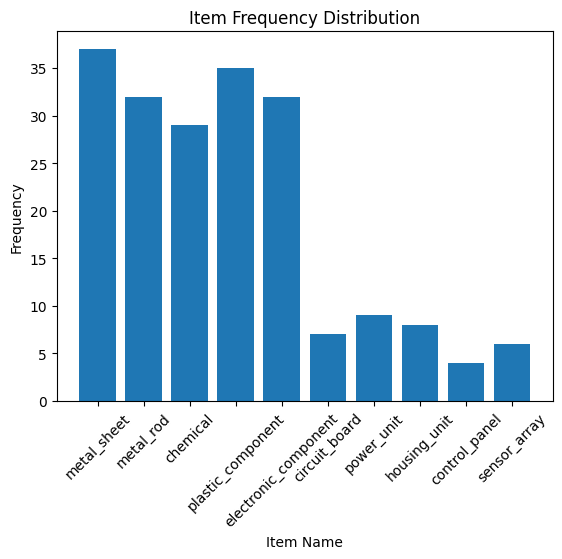

In [92]:
import matplotlib.pyplot as plt

items = list(items_freq.keys())
frequencies = list(items_freq.values())

# Create the bar chart
plt.bar(items, frequencies)
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title('Item Frequency Distribution')
plt.xticks(rotation=45)  # Rotate item names for better readability
plt.show()

In [93]:
df = pd.DataFrame.from_dict(items_freq, orient='index', columns=['Frequency'])
df = df.reset_index().rename(columns={'index': 'Item'})

# Create the bar chart
fig = px.bar(df, x='Item', y='Frequency', title='Item Frequencies')
fig.show()

# Temporal

In [137]:
base_url = "https://bug-hardy-obviously.ngrok-free.app"
version = "NSS_1000_12"

getVersions = f"{base_url}/versions"
getTimestamp = f"{base_url}/archive/schema/{version}"
getdata = f"{base_url}/archive/schema/{version}"

In [139]:
data = requests.get(getTimestamp).json()
totalTimeStamps = len(data)
totalTimeStamps

11

In [141]:
files = []
for i in range(1,totalTimeStamps+1) :
    files.append(f"{getdata}/{i}")

In [143]:
files

['https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/1',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/2',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/3',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/4',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/5',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/6',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/7',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/8',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/9',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/10',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/11']

In [178]:
# load the files[0]
data = requests.get(files[0]).json()

# load the json file
import json
type(data)
data.keys()

dict_keys(['directed', 'multigraph', 'graph', 'node_types', 'relationship_types', 'node_values', 'link_values'])

In [179]:
data["directed"]

True

In [209]:
graph = nx.DiGraph()

In [211]:
for node_type, nodes in data["node_values"].items():
    for node in nodes:
        node_id = node[-1]
        node_attributes = dict(zip(data["node_types"][node_type], node))
        graph.add_node(node_id, **node_attributes)

all_edge_types = data["relationship_types"]
for link_type,link_values in data["link_values"].items():
    for edge_data in link_values :
        attributes = {}
        for j in range(len(edge_data) - 2):
            key = all_edge_types[link_type][j]
            attributes[key] = edge_data[j]
        graph.add_edge(edge_data[-2], edge_data[-1], **attributes)


In [212]:
graph.number_of_edges()

4539

In [213]:
graph.number_of_nodes()

1025

In [202]:
import json
from functools import lru_cache
import networkx as nx

class TemporalGraphClass:
    def __init__(self, files):
        self.files = files  # List of JSON file paths

    @lru_cache(maxsize=10)
    def load_graph_at_timestamp(self, timestamp):
        data = requests.get(files[timestamp]).json()
        return self._json_to_graph(data)

    def _json_to_graph(self, data):
        graph = nx.DiGraph() if data["directed"] else nx.Graph()
        for node_type, nodes in data["node_values"].items():
            for node in nodes:
                node_id = node[-1]
                node_attributes = dict(zip(data["node_types"][node_type], node))
                graph.add_node(node_id, **node_attributes)

        all_edge_types = data["relationship_types"]
        for link_type,link_values in data["link_values"].items():
            for edge_data in link_values :
                attributes = {}
                for j in range(len(edge_data) - 2):
                    key = all_edge_types[link_type][j]
                    attributes[key] = edge_data[j]
                graph.add_edge(edge_data[-2], edge_data[-1], **attributes)

        return graph

In [204]:
obj = TemporalGraphClass(files)

In [206]:
graph = obj.load_graph_at_timestamp(1)

In [207]:
graph

# call data

In [ ]:
base_url = "https://selected-arachnid-sharp.ngrok-free.app/api"
version = "NSS_2000_15_Simulation"
timestamp = "1"

getdata = f"{base_url}/archive/schema/{version}/{timestamp}"
print(getdata)


data = requests.get(getdata).json()
data

https://selected-arachnid-sharp.ngrok-free.app/api/archive/schema/NSS_2000_15_Simulation/1


{'directed': True,
 'multigraph': False,
 'graph': {},
 'node_types': {'BUSINESS_GROUP': ['node_type',
   'name',
   'description',
   'revenue',
   'id'],
  'PRODUCT_FAMILY': ['node_type', 'name', 'revenue', 'id'],
  'PRODUCT_OFFERING': ['node_type', 'name', 'cost', 'demand', 'id'],
  'SUPPLIERS': ['node_type',
   'name',
   'location',
   'reliability',
   'size',
   'size_category',
   'supplied_part_types',
   'id'],
  'WAREHOUSE': ['node_type',
   'name',
   'type',
   'location',
   'size_category',
   'max_capacity',
   'current_capacity',
   'safety_stock',
   'max_parts',
   'id'],
  'FACILITY': ['node_type',
   'name',
   'type',
   'location',
   'max_capacity',
   'operating_cost',
   'id'],
  'PARTS': ['node_type',
   'name',
   'type',
   'subtype',
   'cost',
   'importance_factor',
   'valid_from',
   'valid_till',
   'id']},
 'relationship_types': {'BUSINESS_GROUPToPRODUCT_FAMILY': ['relationship_type',
   'source',
   'target'],
  'PRODUCT_FAMILYToPRODUCT_OFFERING': [

In [14]:
graph = nx.DiGraph()

for node_type, nodes in data["node_values"].items():
    for node in nodes:
        node_id = node[-1]
        node_attributes = dict(zip(data["node_types"][node_type], node))
        graph.add_node(node_id, **node_attributes)

all_edge_types = data["relationship_types"]
for link_type,link_values in data["link_values"].items():
    for edge_data in link_values :
        attributes = {}
        for j in range(len(edge_data) - 2):
            key = all_edge_types[link_type][j]
            attributes[key] = edge_data[j]
        graph.add_edge(edge_data[-2], edge_data[-1], **attributes)


In [15]:
graph.number_of_edges()

9888

# call data live

In [ ]:
# version = "NSS_2000_15_Simulation"
version = "NSS_300_100"
url = f"https://selected-arachnid-sharp.ngrok-free.app/api/schema/live/{version}/compressed"
data = requests.get(url).json()
data

# store the data in a json file
path = f"E:\LAM\Graph Server\Supply_Chain_Dashboard\{version}.json"
with open(path, "w") as f:
    json.dump(data, f)

In [22]:
# version = "NSS_2000_15_Simulation"
version = "NSS_300_100"

# load the json file
path = f"E:\LAM\Graph Server\Supply_Chain_Dashboard\{version}.json"
with open(path, "r") as f:
    data = json.load(f)
data

{'directed': True,
 'multigraph': False,
 'graph': {},
 'node_types': {'BUSINESS_GROUP': ['node_type',
   'name',
   'description',
   'revenue',
   'id'],
  'PRODUCT_FAMILY': ['node_type', 'name', 'revenue', 'id'],
  'PRODUCT_OFFERING': ['node_type', 'name', 'cost', 'demand', 'id'],
  'SUPPLIERS': ['node_type',
   'name',
   'location',
   'reliability',
   'size',
   'size_category',
   'supplied_part_types',
   'id'],
  'WAREHOUSE': ['node_type',
   'name',
   'type',
   'location',
   'size_category',
   'max_capacity',
   'current_capacity',
   'safety_stock',
   'max_parts',
   'capacity',
   'id'],
  'FACILITY': ['node_type',
   'name',
   'type',
   'location',
   'max_capacity',
   'operating_cost',
   'id'],
  'PARTS': ['node_type',
   'name',
   'type',
   'subtype',
   'cost',
   'importance_factor',
   'valid_from',
   'valid_till',
   'id']},
 'relationship_types': {'BUSINESS_GROUPToPRODUCT_FAMILY': ['relationship_type',
   'source',
   'target'],
  'PRODUCT_FAMILYToPRODU

In [17]:
graph = nx.DiGraph()

for node_type, nodes in data["node_values"].items():
    for node in nodes:
        node_id = node[-1]
        node_attributes = dict(zip(data["node_types"][node_type], node))
        graph.add_node(node_id, **node_attributes)

all_edge_types = data["relationship_types"]
for link_type,link_values in data["link_values"].items():
    for edge_data in link_values :
        attributes = {}
        for j in range(len(edge_data) - 2):
            key = all_edge_types[link_type][j]
            attributes[key] = edge_data[j]
        graph.add_edge(edge_data[-2], edge_data[-1], **attributes)


In [4]:
print(graph.number_of_nodes())
print(graph.number_of_edges())

323
1285


In [5]:
# w = ["W_036" , "W_043", "W_044"]
w = {'W_246': 342, 'W_249': 625, 'W_287': 131, 'W_298': 63, 'W_300': 693}

for warehouse in data["node_values"]["WAREHOUSE"] :
    if warehouse[-1] in w :
        print(warehouse)

In [1]:
def plot_networkx_graph(graph):
    # Calculate positions for nodes
    pos = nx.kamada_kawai_layout(graph)

    # Extract edge coordinates
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    # Create edge trace
    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # Extract node coordinates and attributes
    node_x = []
    node_y = []
    node_text = []
    for node in graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(str(node))  # Display node ID or any other attribute

    # Create node trace
    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            color='#1f78b4',  # Node color
            line=dict(width=2, color='white')
        ),
        text=node_text  # Node labels
    )

    # Combine traces into a figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title="Network Graph Visualization",
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False)))

    return fig


In [2]:
# visualize the graph ego graph
import plotly.io as pio
pio.renderers.default = 'notebook'  # Set the default renderer to Jupyter

ego = nx.ego_graph(graph,"PO_001", radius=1, undirected=True)
fig = plot_networkx_graph(ego)
from plotly.offline import iplot
iplot(fig)

# fig.show()
# 

NameError: name 'nx' is not defined

# Supply Chain Query

In [6]:
def check_units_available_in_warehouse(graph,product_id,product_id_node) :
    

    in_edges = graph.in_edges(product_id_node[0],data=True)
    available = {}

    for source,target,edge_data in in_edges :
        if edge_data["relationship_type"] == "WAREHOUSEToPRODUCT_OFFERING" and target == product_id :
            if source not in available :
                available[source] = 0

            available[source] += edge_data["inventory_level"]

    return available


In [ ]:
def find_facilty_making_product(graph,product_id,product_id_node) :
    in_edges = graph.in_edges(product_id_node[0],data=True)
    facility = {}

    for source,target,edge_data in in_edges :
        if edge_data["relationship_type"] == "FACILITYToPRODUCT_OFFERING" and target == product_id :
            if target not in facility :
                facility[target] = []

            facility[product_id].append(source)

    return facility


In [ ]:
# DONE got the facilty making the product
# next need to find the raw materials required to make the product
# now multiply it with the number of required units
# check if the raw materials are available in the warehouse
# if yes then return the time and cost to make the product
# if no then return suppliers to procure the raw materials

In [24]:
def find_raw_materials_to_make_product(data,facility) :
    raw_materials = {}
    facility_to_parts = data["link_values"]["FACILITYToPARTS"]
    for edge_data in facility_to_parts :
        if edge_data[-2] == facility :
            raw_materials[edge_data[-1]] = [edge_data[3],edge_data[1],edge_data[2]] # quantity , cost , lead time

    return raw_materials

product_id = "PO_001"
find_raw_materials_to_make_product(data,"F_001")


{'P_114': [4, 117.08037965790517, 27.6673380575539]}

In [25]:
def find_total_cost(raw_materials,needed_units) :
    for key, values in raw_materials.items():
        raw_materials[key] = [value * needed_units for value in values]

    return raw_materials

def calulate_cost_and_time(total) :
    cost = 0
    time = 0
    for key, values in total.items():
        cost += values[1]
        time += values[2]

    return cost,time

In [ ]:
def check_warehouse_have_enough_raw_material(data,raw_materials) :
    warehouse = data["link_values"]["WAREHOUSEToPARTS"]
    all_raw_materials = {}
    for k,v in raw_materials.items() :
        all_raw_materials[k] = v[0]

    for edge_data in warehouse :
        if edge_data[-1] in all_raw_materials :
            all_raw_materials[edge_data[-1]] -= edge_data[3]

    for k,v in raw_materials.items() :
        if v > 0 :
            return False
    
    return True

In [ ]:
# given a part type return the suppliers who can supply that part type

In [ ]:
def get_supplier_for_raw_material(data,raw_materials) :
    warehouses = data["link_values"]["WAREHOUSEToPARTS"]
    warehouses_containing_raw_materials = []

    for edge_data in warehouses :
        if edge_data[-1] in raw_materials :
            warehouses_containing_raw_materials.append(edge_data[-2])

    suppliers = data["link_values"]["SUPPLIERSToWAREHOUSE"]
    suppliers_for_raw_material = []

    for edge_data in suppliers :
        if edge_data[-2] in warehouses_containing_raw_materials :
            suppliers_for_raw_material.append(edge_data[-1])

    return suppliers_for_raw_material

get_supplier_for_raw_material(data,{"P_001": 10})

[]

: 

In [ ]:
def supply_chain_query(graph,product_id,units,product_id_node) :

    warehouse_containing_product_id = check_units_available_in_warehouse(graph,product_id)
    
    if sum(warehouse_containing_product_id.values()) >= units :
        return [1,warehouse_containing_product_id] # 1 - Demand can be satisfied by warehouse
    
    else :

        available_units = sum(warehouse_containing_product_id.values())
        
        facility = find_facilty_making_product(graph,product_id,product_id_node)

        raw_materials = find_raw_materials_to_make_product(data,facility)

        total_raw_materials = find_total_cost(raw_materials,units - available_units)

        check,needed_raw_material = check_warehouse_have_enough_raw_material(graph,facility,units - available_units)

        if check :
            cost,time = calulate_cost_and_time(total_raw_materials)
            return [2,total_raw_materials,cost,time,units - available_units] # 2 - Demand can be satisfied by making new products
        
        else :
            suppliers = get_supplier_for_raw_material(data,needed_raw_material)
            return [3,suppliers] # 3 - Demand can't be satisfied as not enough parts to make new products


In [ ]:
product_id = "PO_001"
units = 1000

for node in graph.nodes(data=True):
    if node[0] == product_id :
        product_id_node = node
        break

choice , supply_chain_data = supply_chain_query(graph,product_id,units,product_id_node)

if choice == 1 :
    print("Demand of",units,"can be satisfied")
    print("Total available units of",product_id,":",sum(supply_chain_data.values()))

    for warehouse,units in supply_chain_data.items() :
        print("Warehouse",warehouse,"has",units,"units of",product_id)

elif choice == 2 :
    pass

elif choice == 3 :
    pass


{'relationship_type': 'PRODUCT_FAMILYToPRODUCT_OFFERING'}
{'relationship_type': 'WAREHOUSEToPRODUCT_OFFERING', 'inventory_level': 342, 'storage_cost': 171.8551491996187}
{'relationship_type': 'WAREHOUSEToPRODUCT_OFFERING', 'inventory_level': 625, 'storage_cost': 69.21480920409098}
{'relationship_type': 'WAREHOUSEToPRODUCT_OFFERING', 'inventory_level': 131, 'storage_cost': 163.03411110684155}
{'relationship_type': 'WAREHOUSEToPRODUCT_OFFERING', 'inventory_level': 63, 'storage_cost': 14.379951834563807}
{'relationship_type': 'WAREHOUSEToPRODUCT_OFFERING', 'inventory_level': 693, 'storage_cost': 185.0144590260643}
{'relationship_type': 'FACILITYToPRODUCT_OFFERING', 'product_cost': 106.98632640623866, 'lead_time': 13.27200802519625, 'quantity': 2}
{'relationship_type': 'FACILITYToPRODUCT_OFFERING', 'product_cost': 70.31957044782973, 'lead_time': 12.328378894082032, 'quantity': 19}
{'relationship_type': 'FACILITYToPRODUCT_OFFERING', 'product_cost': 101.20748622451683, 'lead_time': 13.725801

# EGO

In [18]:
def _json_to_graph(data):
    graph = nx.DiGraph() if data["directed"] else nx.Graph()
    for node_type, nodes in data["node_values"].items():
        for node in nodes:
            node_id = node[-1]
            node_attributes = dict(zip(data["node_types"][node_type], node))
            graph.add_node(node_id, **node_attributes)

    all_edge_types = data["relationship_types"]
    for link_type,link_values in data["link_values"].items():
        for edge_data in link_values :
            attributes = {}
            for j in range(len(edge_data) - 2):
                key = all_edge_types[link_type][j]
                attributes[key] = edge_data[j]
            graph.add_edge(edge_data[-2], edge_data[-1], **attributes)

    return graph

In [19]:

def plotly_ego_graph(ego_graph):
    """
    Visualizes the ego graph using Plotly, displaying node IDs as labels and attributes on hover.
    """
    # pos = nx.spring_layout(ego_graph)
    pos = nx.kamada_kawai_layout(ego_graph)
    
    # Edges
    edge_x = []
    edge_y = []
    edge_hover_text = []

    for edge in ego_graph.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_y.append(y0)
        edge_x.append(x1)
        edge_y.append(y1)
        edge_x.append(None)  # To separate edges visually
        edge_y.append(None)

        # Format hover text for edges
        attributes = edge[2]
        hover_details = [f"{key}: {value}" for key, value in attributes.items()]
        edge_hover_text.append("<br>".join(hover_details))

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color="gray"),
        hoverinfo="text",
        hovertext=edge_hover_text,  # Show edge attributes on hover
        mode="lines"
    )

    # Nodes
    node_x = []
    node_y = []
    node_ids = []
    node_hover_text = []

    for node in ego_graph.nodes(data=True):
        x, y = pos[node[0]]
        node_x.append(x)
        node_y.append(y)
        node_ids.append(str(node[0]))  # Use node ID as label

        # Format hover text for nodes
        attributes = node[1]
        hover_details = [f"{key}: {value}" for key, value in attributes.items()]
        node_hover_text.append("<br>".join(hover_details))

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers+text",  # Display labels with text
        text=node_ids,  # Node IDs as labels
        textposition="top center",
        hoverinfo="text",
        hovertext=node_hover_text,  # Show attributes on hover
        marker=dict(
            showscale=False,
            colorscale="YlGnBu",
            size=20,
            color=[1] * len(node_x),
        ),
    )

    layout = go.Layout(
        title=dict(
            text="Ego Graph Visualization",
            x=0.0,
            font=dict(size=18)
        ),
        showlegend=False,
        hovermode="closest",
        xaxis=dict(showgrid=False, zeroline=False, visible=False),
        yaxis=dict(showgrid=False, zeroline=False, visible=False),
        height=400,
        margin=dict(l=80, r=40, t=80, b=50),  # Adjust margins
    )

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    return fig


In [20]:
def ego_graph_query(graph, node_id, radius):
    """
    Returns the ego graph for a specific node within a given radius.
    """
    ego_graph = nx.ego_graph(graph, node_id, radius=radius)
    return ego_graph 

In [21]:
product_family_id = "PO_001"
graph = _json_to_graph(data)

In [22]:
ego_graph = ego_graph_query(graph, product_family_id, 1)
if ego_graph:
    st.write(f"### Neighbors for {product_family_id}")
    fig = plotly_ego_graph(ego_graph)
    st.plotly_chart(fig)

2024-12-09 11:16:59.602 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 11:16:59.836 
  command:

    streamlit run e:\LAM\Graph Server\Supply_Chain_Dashboard\venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-09 11:16:59.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 11:16:59.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 11:16:59.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


ModuleNotFoundError: No module named 'scipy'